In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
# 1. Cargar el dataset
url = "https://github.com/stedy/Machine-Learning-with-R-datasets/raw/master/insurance.csv"
df = pd.read_csv(url)


In [3]:
# 2. Selección de variables: solo edad y bmi
X = df[['age', 'bmi']].values  # n x 2
y = df['charges'].values.reshape(-1, 1)  # n x 1

In [ ]:
# 3. Normalización manual (esencial para gradiente)
s
X_norm = (X - X_mean) / X_std
X_norm

array([[-1.43876426, -0.45332   ],
       [-1.50996545,  0.5096211 ],
       [-0.79795355,  0.38330685],
       ...,
       [-1.50996545,  1.0148781 ],
       [-1.29636188, -0.79781341],
       [ 1.55168573, -0.26138796]], shape=(1338, 2))

In [5]:
# 4. Añadir columna de 1s para el bias (intercepto θ0)
n = X.shape[0]  # número de ejemplos
X_b = np.hstack((np.ones((n, 1)), X_norm))  # n x 3
X_b

array([[ 1.        , -1.43876426, -0.45332   ],
       [ 1.        , -1.50996545,  0.5096211 ],
       [ 1.        , -0.79795355,  0.38330685],
       ...,
       [ 1.        , -1.50996545,  1.0148781 ],
       [ 1.        , -1.29636188, -0.79781341],
       [ 1.        ,  1.55168573, -0.26138796]], shape=(1338, 3))

In [14]:
# 5. Inicialización aleatoria de parámetros θ
random.seed(42)
theta = np.random.randn(X_b.shape[1], 1)  # 3 x 1 (θ0, θ1, θ2)
theta

array([[-0.85541196],
       [ 1.60045707],
       [-0.49724498]])

In [7]:
# 6. Función de costo J(θ) = (1/2n) * sum((h - y)^2)
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X @ theta  # hθ(x)
    cost = (1 / (2 * m)) * np.sum((predictions - y)**2)
    return cost

In [8]:
# 7. Gradiente vectorizado: ∇J(θ) = (1/n) * Xᵀ (Xθ - y)
def compute_gradient(X, y, theta):
    m = len(y)
    return (1 / m) * (X.T @ (X @ theta - y))

In [9]:
# 8. Descenso del gradiente
def gradient_descent(X, y, theta, alpha=0.1, iterations=1000):
    cost_history = []

    for i in range(iterations):
        gradient = compute_gradient(X, y, theta)
        theta = theta - alpha * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

        if i % 100 == 0:
            print(f"Iteración {i}: Costo = {cost:.2f}")

    return theta, cost_history


In [10]:
y


array([[16884.924 ],
       [ 1725.5523],
       [ 4449.462 ],
       ...,
       [ 1629.8335],
       [ 2007.945 ],
       [29141.3603]], shape=(1338, 1))

In [11]:
# 9. Ejecutar optimización
theta_final, cost_history = gradient_descent(X_b, y, theta, alpha=0.1, iterations=20)


Iteración 0: Costo = 142813550.10


In [12]:
# 10. Mostrar resultados
print("Parámetros finales (θ):")
for i, value in enumerate(theta_final):
    print(f"θ{i} = {value[0]:.4f}")


Parámetros finales (θ):
θ0 = 11656.9318
θ1 = 3033.6970
θ2 = 1877.3438


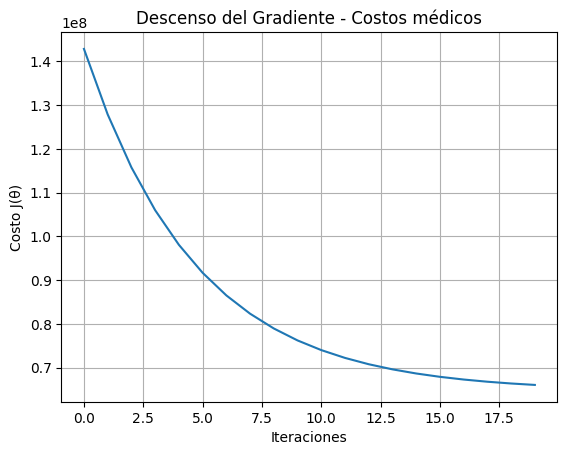

In [13]:
# 11. Graficar el descenso del costo
plt.plot(cost_history)
plt.xlabel("Iteraciones")
plt.ylabel("Costo J(θ)")
plt.title("Descenso del Gradiente - Costos médicos")
plt.grid(True)
plt.show()